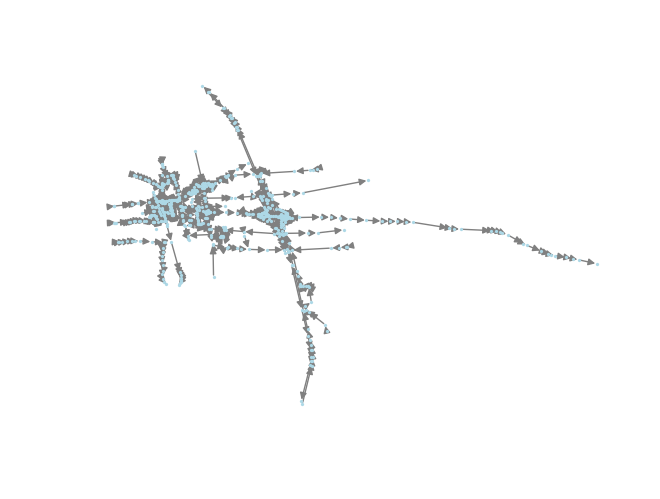

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))


# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    
    # eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue

    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id)


#retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))

# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, font_size=5, node_size=5, node_color='lightblue', edge_color='gray', linewidths=0.1)

plt.show()

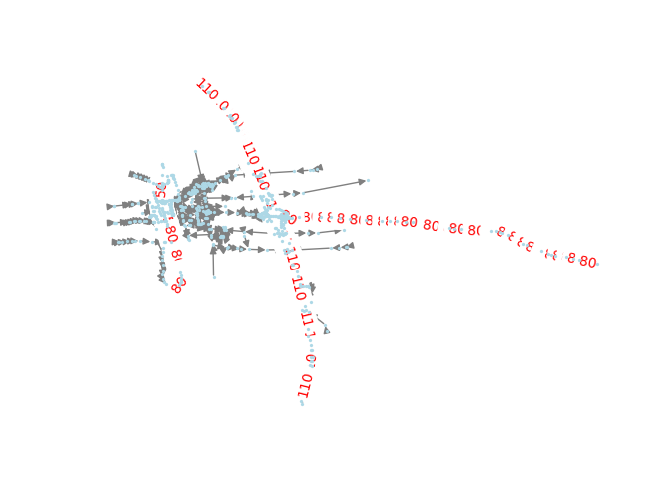

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Dictionnaire pour stocker la valeur "maxspeed" de chaque arête
maxspeed_dict = {}

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))


# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    
    # eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue

    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    
    # Récupérer la valeur "maxspeed" s'il y en a une
    maxspeed = way.find(".//tag[@k='maxspeed']")
    if maxspeed is not None:
        maxspeed_value = maxspeed.get('v')
        # Associer la valeur "maxspeed" à chaque arête
        for edge in zip(nodes[:-1], nodes[1:]):
            maxspeed_dict[edge] = maxspeed_value
    
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id)


#retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))

# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, font_size=5, node_size=5, node_color='lightblue', edge_color='gray', linewidths=0.1)

# Ajouter les labels des arêtes
nx.draw_networkx_edge_labels(G, pos, edge_labels=maxspeed_dict, font_color='red')

plt.show()

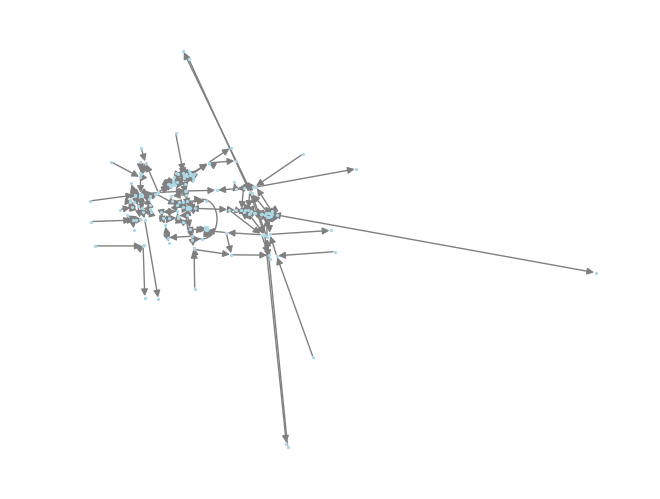

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))


# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    
    # eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue

    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id)


#retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))

# Identifier les nœuds avec une route entrante et une route sortante
nodes_to_remove = []
for node in G.nodes():
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    if len(predecessors) == 1 and len(successors) == 1:
        nodes_to_remove.append(node)

# Supprimer les nœuds et ajouter les routes directes entre les voisins
for node in nodes_to_remove:
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    G.remove_node(node)
    G.add_edge(predecessors[0], successors[0])

# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, font_size=5, node_size=5, node_color='lightblue', edge_color='gray', linewidths=0.1)

plt.show()


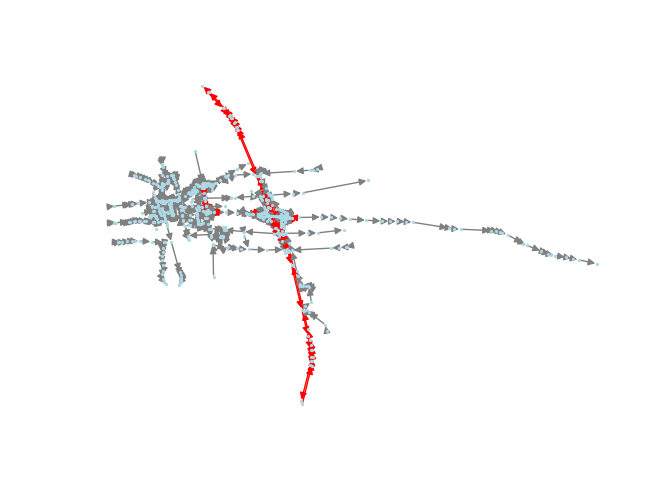

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))


# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    
    # eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue
    
    # Vérifier si la relation (way) est à sens unique
    if way.find(".//tag[@k='oneway']") is not None:
        oneway = way.find(".//tag[@k='oneway']").get('v')
        if oneway == 'yes':
            edge_color = 'red'
        else:
            edge_color = 'gray'
    else:
        edge_color = 'gray'

    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id, color=edge_color)


#retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))


# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
edge_colors = [G[edge[0]][edge[1]]['color'] for edge in G.edges()]
nx.draw(G, pos, with_labels=False, font_size=5, node_size=5, node_color='lightblue', edge_color=edge_colors, linewidths=0.1)

plt.show()

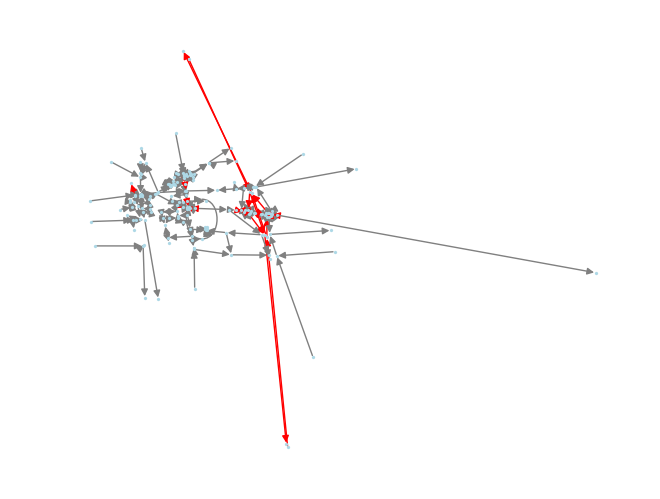

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))


# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    
    # eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue
    
    # Vérifier si la relation (way) est à sens unique
    if way.find(".//tag[@k='oneway']") is not None:
        oneway = way.find(".//tag[@k='oneway']").get('v')
        if oneway == 'yes':
            edge_color = 'red'
            edge_type = 'oneway'
        else:
            edge_color = 'gray'
            edge_type = 'twoway'
    else:
        edge_color = 'gray'
        edge_type = 'twoway'

    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id, color=edge_color, type=edge_type)


# Retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))

# Identifier les nœuds avec une route entrante et une route sortante
nodes_to_remove = []
for node in G.nodes():
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    if len(predecessors) == 1 and len(successors) == 1:
        pred_edge_type = G[predecessors[0]][node]['type']
        succ_edge_type = G[node][successors[0]]['type']
        if pred_edge_type == succ_edge_type:
            nodes_to_remove.append(node)


# Supprimer les nœuds et ajouter les routes directes entre les voisins
for node in nodes_to_remove:
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    pred_edge_type = G[predecessors[0]][node]['type']
    succ_edge_type = G[node][successors[0]]['type']
    pred_edge_color = G[predecessors[0]][node]['color']
    succ_edge_color = G[node][successors[0]]['color']
    G.remove_node(node)
    G.add_edge(predecessors[0], successors[0], type=pred_edge_type, color=pred_edge_color)


# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
edge_colors = [G[edge[0]][edge[1]]['color'] for edge in G.edges()]
nx.draw(G, pos, with_labels=False, font_size=5, node_size=5, node_color='lightblue', edge_color=edge_colors, linewidths=0.1)

plt.show()

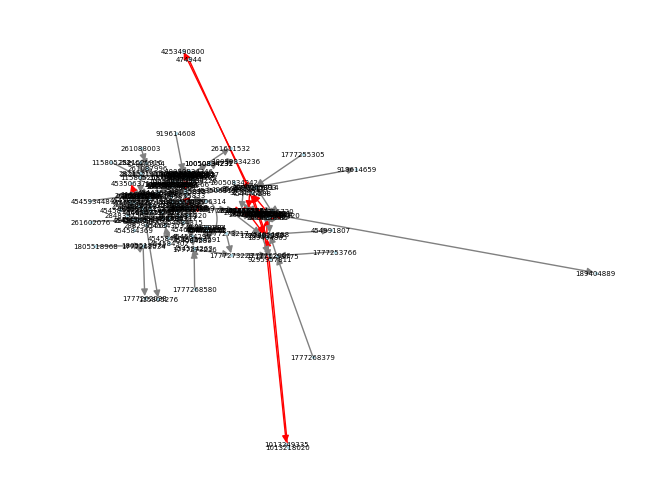

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Charger le fichier OSM
tree = ET.parse('map_bischo_petit.osm')
root = tree.getroot()

# Créer un graphe dirigé avec networkx
G = nx.DiGraph()

# Parcourir les nœuds (nodes) du fichier OSM
for node in root.findall(".//node"):
    node_id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    G.add_node(node_id, pos=(lon, lat))

# Parcourir les relations (ways) du fichier OSM
for way in root.findall(".//way"):
    # Eliminer les ways qui ne sont pas des routes
    highway = way.find(".//tag[@k='highway']")
    if highway is None:
        continue
    # Eliminer les ways qui sont des footways
    if highway.get('v') == 'footway':
        continue
    
    # Vérifier si la relation (way) est à sens unique
    if way.find(".//tag[@k='oneway']") is not None:
        oneway = way.find(".//tag[@k='oneway']").get('v')
        if oneway == 'yes':
            edge_color = 'red'
            edge_type = 'oneway'
        else:
            edge_color = 'gray'
            edge_type = 'twoway'
    else:
        edge_color = 'gray'
        edge_type = 'twoway'
    
    # Ajouter la vitesse sur la voie
    speed_tag = way.find(".//tag[@k='maxspeed']")
    speed = int(speed_tag.get('v').split()[0]) if speed_tag is not None else 50  # La vitesse par défaut est 50 km/h
    
    way_id = way.get('id')
    nodes = [nd.get('ref') for nd in way.findall(".//nd")]
    G.add_edges_from(zip(nodes[:-1], nodes[1:]), id=way_id, color=edge_color, type=edge_type, speed=speed)

# Retirer les noeuds isolés
G.remove_nodes_from(list(nx.isolates(G)))

# Identifier les nœuds avec une route entrante et une route sortante
nodes_to_remove = []
for node in G.nodes():
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    if len(predecessors) == 1 and len(successors) == 1:
        pred_edge_type = G[predecessors[0]][node]['type']
        succ_edge_type = G[node][successors[0]]['type']
        pred_edge_speed = G[predecessors[0]][node]['speed']
        succ_edge_speed = G[node][successors[0]]['speed']
        
        # Vérifier que la vitesse des deux voisins est la même
        if pred_edge_type == succ_edge_type and pred_edge_speed == succ_edge_speed:
            nodes_to_remove.append(node)

# Supprimer les nœuds et ajouter les routes directes entre les voisins
for node in nodes_to_remove:
    predecessors = list(G.predecessors(node))
    successors = list(G.successors(node))
    pred_edge_type = G[predecessors[0]][node]['type']
    succ_edge_type = G[node][successors[0]]['type']
    pred_edge_color = G[predecessors[0]][node]['color']
    succ_edge_color = G[node][successors[0]]['color']
    G.remove_node(node)
    G.add_edge(predecessors[0], successors[0], type=pred_edge_type, color=pred_edge_color)

# Dessiner le graphe
pos = nx.get_node_attributes(G, 'pos')
edge_colors = [G[edge[0]][edge[1]]['color'] for edge in G.edges()]
nx.draw(G, pos, with_labels=True, font_size=5, node_size=5, node_color='lightblue', edge_color=edge_colors, linewidths=0.1)

plt.show()